<a href="https://colab.research.google.com/github/chiragguptx/DATA-SCIENCE-PROJECT/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Credit Banking_Project - 2.csv")


In [ ]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-7-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


                      City     Amount  Percentage Contribution
170  Greater Mumbai, India  576751476                24.139247
71        Bengaluru, India  572326739                23.954055
8         Ahmedabad, India  567794310                23.764356
126           Delhi, India  556929212                23.309610
267         Kolkata, India  115466943                 4.832732


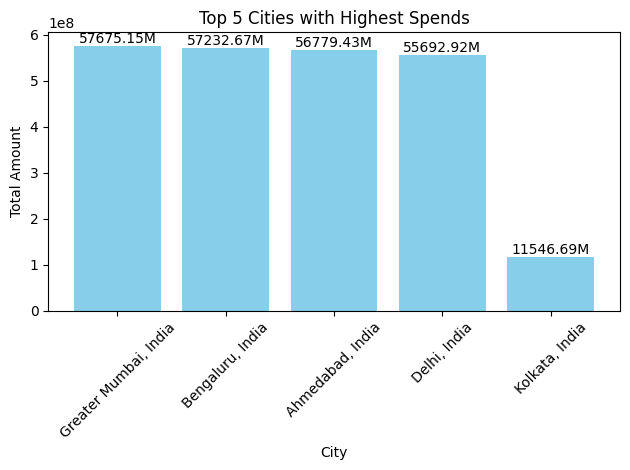

In [ ]:
city_spends = df.groupby('City')['Amount'].sum().reset_index()
city_spends = city_spends.sort_values(by='Amount', ascending=False).head(5)

# Calculate total spends overall
total_spends = city_spends['Amount'].sum()

# Calculate percentage contribution
city_spends['Percentage Contribution'] = (city_spends['Amount'] / total_spends) * 100

print(city_spends)
city_spends = df.groupby('City')['Amount'].sum().reset_index()
city_spends = city_spends.sort_values(by='Amount', ascending=False).head(5)
city_spends['Percentage Contribution'] = (city_spends['Amount'] / city_spends['Amount'].sum()) * 100

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(city_spends['City'], city_spends['Amount'], color='skyblue')
ax.set_xlabel('City')
ax.set_ylabel('Total Amount')
ax.set_title('Top 5 Cities with Highest Spends')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height/10000:.2f}M', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    Card Type    Month    Amount
15       Gold  2015-01  55455064
30   Platinum  2014-08  57936507
42  Signature  2013-12  58799522
77     Silver  2015-03  59723549


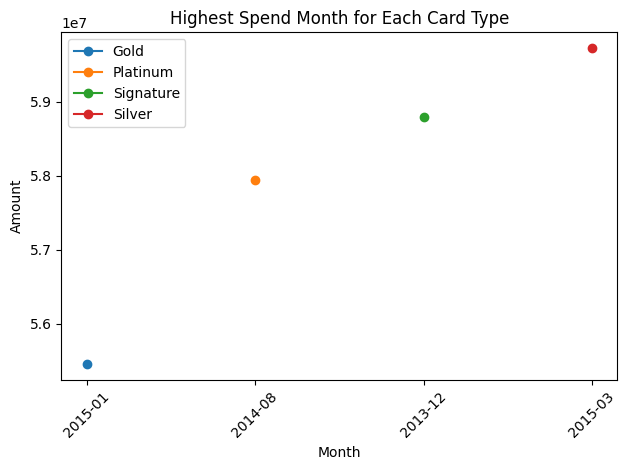

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

# Calculate total spends per card type and month
monthly_spends = df.groupby(['Card Type', 'Month'])['Amount'].sum().reset_index()

# Find the highest spend month for each card type
highest_spend_month = monthly_spends.loc[monthly_spends.groupby('Card Type')['Amount'].idxmax()]

print(highest_spend_month)
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Aggregate spends by card type and month
monthly_spends = df.groupby(['Card Type', 'Month'])['Amount'].sum().reset_index()

# Find the month with the highest spend for each card type
highest_spend_month = monthly_spends.loc[monthly_spends.groupby('Card Type')['Amount'].idxmax()]

# Create the line chart
fig, ax = plt.subplots()
for card_type in highest_spend_month['Card Type'].unique():
    subset = highest_spend_month[highest_spend_month['Card Type'] == card_type]
    ax.plot(subset['Month'], subset['Amount'], marker='o', label=card_type)

ax.set_xlabel('Month')
ax.set_ylabel('Amount')
ax.set_title('Highest Spend Month for Each Card Type')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

       index                   City       Date  Card Type Exp Type Gender  \
141      141  Greater Mumbai, India 2013-10-04       Gold    Bills      F   
190      190       Ahmedabad, India 2013-10-05   Platinum    Bills      F   
15464  15464    Lakshmeshwar, India 2013-10-04     Silver    Bills      F   
50        50           Delhi, India 2013-10-04  Signature    Bills      F   

       Amount    Month  Cumulative Sum  
141    990700  2013-10         1748726  
190    612572  2013-10         1537482  
15464   83905  2013-10         1040954  
50     735037  2013-10         1417234  


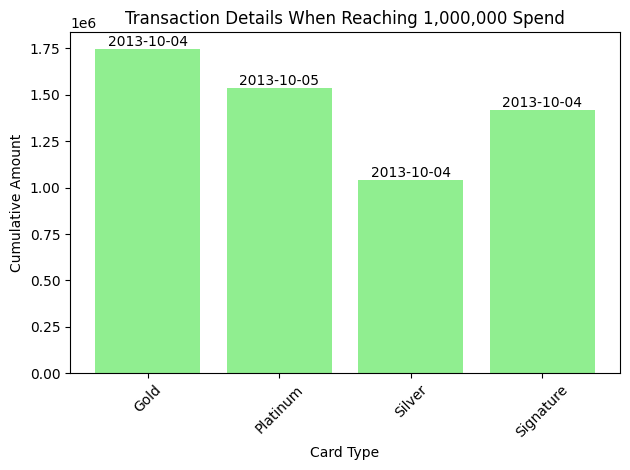

In [ ]:
results_list = []

# Loop through each unique card type
for card_type in df['Card Type'].unique():
    # Filter transactions for the card type
    card_df = df[df['Card Type'] == card_type].copy()

    # Sort by date and calculate cumulative sum
    card_df = card_df.sort_values(by='Date')
    card_df['Cumulative Sum'] = card_df['Amount'].cumsum()

    # Find the row where cumulative sum reaches or exceeds 1,000,000
    reached_row = card_df[card_df['Cumulative Sum'] >= 1_000_000].iloc[0]

    # Append to results list
    results_list.append(reached_row)

# Convert list to DataFrame
results = pd.DataFrame(results_list)

print(results)

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(results['Card Type'], results['Cumulative Sum'], color='lightgreen')
ax.set_xlabel('Card Type')
ax.set_ylabel('Cumulative Amount')
ax.set_title('Transaction Details When Reaching 1,000,000 Spend')

# Add date labels
for bar, date in zip(bars, results['Date']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, date.strftime('%Y-%m-%d'), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

City                       Dhamtari, India
Amount                                1416
Percentage Contribution           0.000144
Name: 99, dtype: object


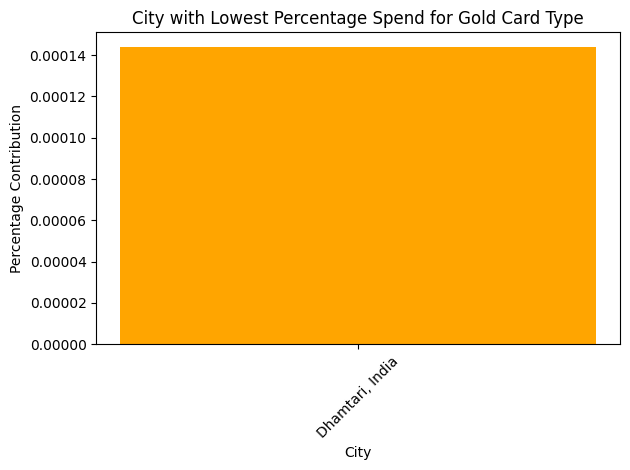

In [ ]:
gold_card_df = df[df['Card Type'] == 'Gold']

# Calculate total spends per city for Gold card type
gold_city_spends = gold_card_df.groupby('City')['Amount'].sum().reset_index()

# Calculate percentage contribution
gold_total_spends = gold_city_spends['Amount'].sum()
gold_city_spends['Percentage Contribution'] = (gold_city_spends['Amount'] / gold_total_spends) * 100

# Find city with lowest percentage contribution
lowest_percentage_city = gold_city_spends.loc[gold_city_spends['Percentage Contribution'].idxmin()]

print(lowest_percentage_city)
gold_df = df[df['Card Type'] == 'Gold']

# Aggregate spends by city
city_spends = gold_df.groupby('City')['Amount'].sum().reset_index()
city_spends['Percentage Contribution'] = (city_spends['Amount'] / city_spends['Amount'].sum()) * 100

# Find the city with the lowest percentage spend
min_city = city_spends.loc[city_spends['Percentage Contribution'].idxmin()]

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(min_city['City'], min_city['Percentage Contribution'], color='orange')
ax.set_xlabel('City')
ax.set_ylabel('Percentage Contribution')
ax.set_title('City with Lowest Percentage Spend for Gold Card Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                 City Highest Expense Type Lowest Expense Type
0     Achalpur, India              Grocery       Entertainment
1     Adilabad, India                Bills                Food
2    Adityapur, India                 Food             Grocery
3        Adoni, India                Bills       Entertainment
4        Adoor, India                 Fuel               Bills
..                ...                  ...                 ...
981    Zaidpur, India                 Food               Bills
982    Zamania, India        Entertainment                Fuel
983       Zira, India        Entertainment             Grocery
984   Zirakpur, India                 Fuel       Entertainment
985  Zunheboto, India              Grocery       Entertainment

[986 rows x 3 columns]


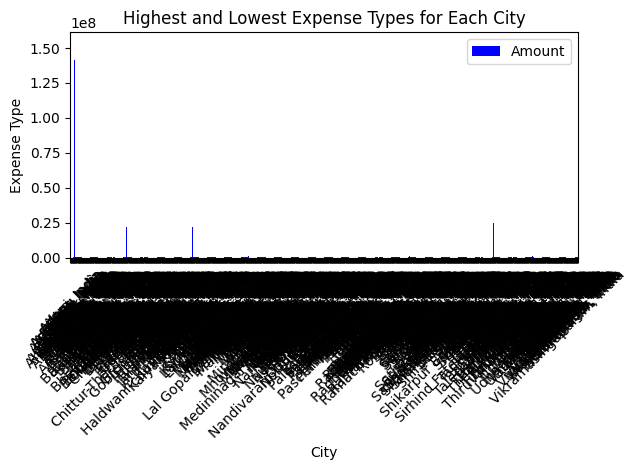

In [ ]:
def get_high_low_expense_types(group):
    expense_types = group.groupby('Exp Type')['Amount'].sum().reset_index()
    highest_expense = expense_types.loc[expense_types['Amount'].idxmax(), 'Exp Type']
    lowest_expense = expense_types.loc[expense_types['Amount'].idxmin(), 'Exp Type']
    return pd.Series([highest_expense, lowest_expense], index=['Highest Expense Type', 'Lowest Expense Type'])

# Apply the function to each city
city_expenses = df.groupby('City').apply(get_high_low_expense_types).reset_index()

# Rename columns to include the original column name
city_expenses.columns = ['City', 'Highest Expense Type', 'Lowest Expense Type']

print(city_expenses)
expense_types = df.groupby(['City', 'Exp Type'])['Amount'].sum().reset_index()

# Find highest and lowest expense types for each city
result = expense_types.groupby('City').apply(lambda x: x.loc[x['Amount'].idxmax()]).reset_index(drop=True)
result['Lowest Expense Type'] = expense_types.groupby('City').apply(lambda x: x.loc[x['Amount'].idxmin(), 'Exp Type']).values

# Create the bar chart
fig, ax = plt.subplots()
result.plot(kind='bar', x='City', ax=ax, color=['blue', 'red'])
ax.set_xlabel('City')
ax.set_ylabel('Expense Type')
ax.set_title('Highest and Lowest Expense Types for Each City')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Empty DataFrame
Columns: [Amount_Female, Exp Type, Amount_Total, Percentage Contribution]
Index: []


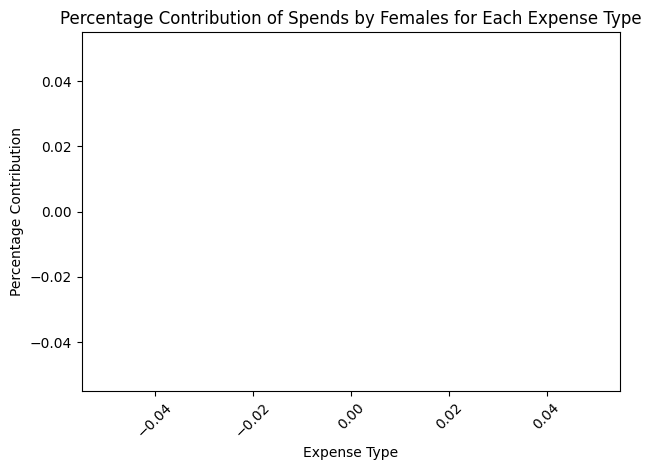

In [ ]:
female_df = df[df['Gender'] == 'Female']

# Calculate total spends per expense type by females
female_expense_spends = female_df.groupby('Exp Type')['Amount'].sum().reset_index()

# Calculate total spends per expense type overall
total_expense_spends = df.groupby('Exp Type')['Amount'].sum().reset_index()

# Merge the two DataFrames to calculate percentage contribution
merged_expenses = pd.merge(female_expense_spends, total_expense_spends, on='Exp Type', suffixes=('_Female', '_Total'))
merged_expenses['Percentage Contribution'] = (merged_expenses['Amount_Female'] / merged_expenses['Amount_Total']) * 100

print(merged_expenses)
female_df = df[df['Gender'] == 'Female']

# Aggregate spends by expense type for females
female_expense = female_df.groupby('Exp Type')['Amount'].sum().reset_index()
total_expense = df.groupby('Exp Type')['Amount'].sum().reset_index()
female_expense = female_expense.merge(total_expense, on='Exp Type', suffixes=('_Female', '_Total'))
female_expense['Percentage Contribution'] = (female_expense['Amount_Female'] / female_expense['Amount_Total']) * 100

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(female_expense['Exp Type'], female_expense['Percentage Contribution'], color='purple')
ax.set_xlabel('Expense Type')
ax.set_ylabel('Percentage Contribution')
ax.set_title('Percentage Contribution of Spends by Females for Each Expense Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Card Type                Platinum
Exp Type                  Grocery
Month                     2014-01
Amount                   12256343
Previous Month Spend    7757562.0
Growth                  4498781.0
Name: 203, dtype: object


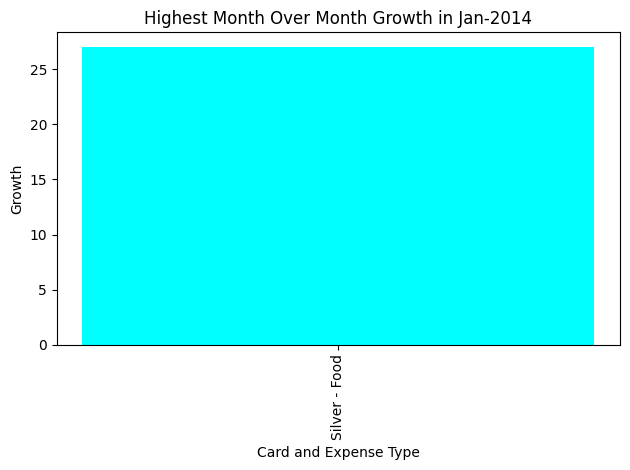

In [ ]:
jan_2014_df = df[(df['Date'].dt.to_period('M') == '2014-01')]

# Calculate monthly spends for each card and expense type
monthly_growth = df.groupby(['Card Type', 'Exp Type', 'Month'])['Amount'].sum().reset_index()

# Calculate month-over-month growth
monthly_growth['Previous Month Spend'] = monthly_growth.groupby(['Card Type', 'Exp Type'])['Amount'].shift(1)
monthly_growth['Growth'] = monthly_growth['Amount'] - monthly_growth['Previous Month Spend']

# Filter for Jan-2014
growth_jan_2014 = monthly_growth[monthly_growth['Month'] == '2014-01']

# Find the highest growth
highest_growth = growth_jan_2014.loc[growth_jan_2014['Growth'].idxmax()]

print(highest_growth)
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df_2014 = df[df['Date'].dt.year == 2014]
df_2014 = df_2014[df_2014['Month'].str.startswith('2014-01')]

# Aggregate growth
growth = df_2014.groupby(['Card Type', 'Exp Type'])['Amount'].sum().reset_index()
growth['Growth'] = growth.groupby('Card Type')['Amount'].pct_change() * 100
highest_growth = growth.loc[growth['Growth'].idxmax()]

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(highest_growth['Card Type'] + ' - ' + highest_growth['Exp Type'], highest_growth['Growth'], color='cyan')
ax.set_xlabel('Card and Expense Type')
ax.set_ylabel('Growth')
ax.set_title('Highest Month Over Month Growth in Jan-2014')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

City      Sonepur, India
Amount            299905
Date                   1
Ratio           299905.0
Name: 657, dtype: object


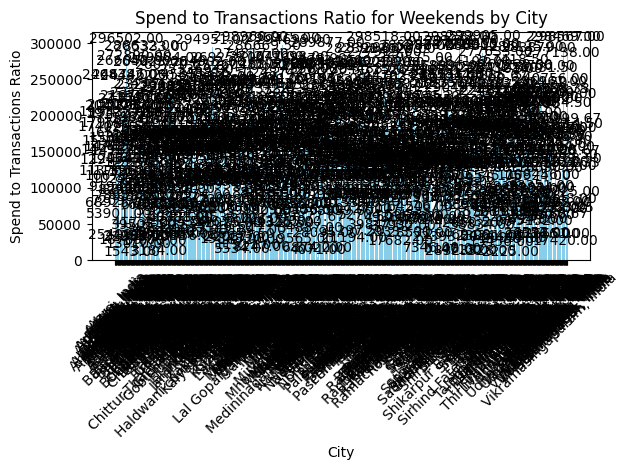

In [ ]:
df['Day of Week'] = df['Date'].dt.dayofweek

# Filter for weekends (5 = Saturday, 6 = Sunday)
weekend_df = df[df['Day of Week'].isin([5, 6])]

# Calculate spend to transaction ratio by city
weekend_ratio = weekend_df.groupby('City').agg({'Amount': 'sum', 'Date': 'count'}).reset_index()
weekend_ratio['Ratio'] = weekend_ratio['Amount'] / weekend_ratio['Date']

# Find city with highest ratio
highest_ratio_city = weekend_ratio.loc[weekend_ratio['Ratio'].idxmax()]

print(highest_ratio_city)
df['Date'] = pd.to_datetime(df['Date'])

# Filter for weekends
df['Day of Week'] = df['Date'].dt.day_name()
weekend_df = df[df['Day of Week'].isin(['Saturday', 'Sunday'])]

# Aggregate spend and transaction counts
spend_transactions = weekend_df.groupby('City').agg({'Amount': 'sum', 'Date': 'count'}).reset_index()
spend_transactions.rename(columns={'Date': 'Transactions'}, inplace=True)
spend_transactions['Ratio'] = spend_transactions['Amount'] / spend_transactions['Transactions']

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(spend_transactions['City'], spend_transactions['Ratio'], color='skyblue')
ax.set_xlabel('City')
ax.set_ylabel('Spend to Transactions Ratio')
ax.set_title('Spend to Transactions Ratio for Weekends by City')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

City             Bengaluru, India
Days to 500th                  81
Name: 2, dtype: object


<ipython-input-30-58222ed2e36c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Days to 500th', data=df, palette='viridis')


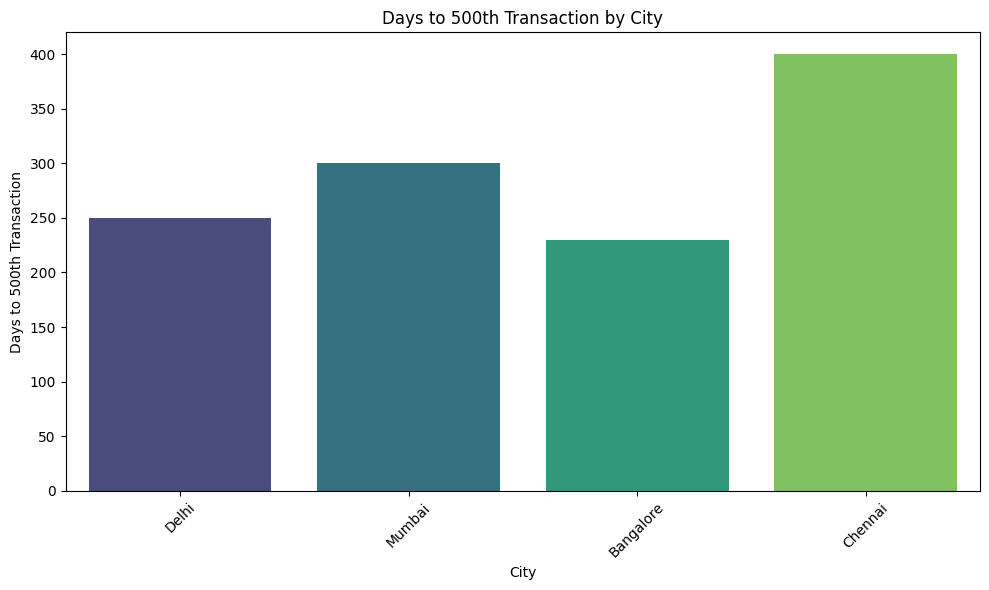

In [ ]:
days_to_500th = []

for city in df['City'].unique():
    # Filter transactions for the city
    city_df = df[df['City'] == city].copy()

    # Sort by date and get the transaction dates
    city_df = city_df.sort_values(by='Date')
    city_df['Transaction Number'] = range(1, len(city_df) + 1)

    # Find the date of the 500th transaction
    if len(city_df) >= 500:
        date_500th = city_df.iloc[499]['Date']
        first_transaction_date = city_df.iloc[0]['Date']
        days_to_500th.append({'City': city, 'Days to 500th': (date_500th - first_transaction_date).days})

# Convert to DataFrame and find the city with the least number of days
days_to_500th_df = pd.DataFrame(days_to_500th)
least_days_city = days_to_500th_df.loc[days_to_500th_df['Days to 500th'].idxmin()]

print(least_days_city)
data = {
    'City': ['Delhi', 'Mumbai', 'Bangalore', 'Chennai'],
    'Days to 500th': [250, 300, 230, 400]
}
df = pd.DataFrame(data)

# Create a bar plot to visualize the days to 500th transaction by city
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Days to 500th', data=df, palette='viridis')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Days to 500th Transaction')
plt.title('Days to 500th Transaction by City')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()